In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_style('whitegrid')
sns.set_context('notebook')

In [170]:
df = pd.read_csv('3510001401-noSymbol.csv', skiprows=4, skipfooter=35)

/home/fin/miniconda3/envs/AMRtime_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [171]:
df = df.T
df.columns = df.iloc[0]
df = df.drop('Unnamed: 0').drop(np.nan, axis=1)
df = df.reset_index()
df = df.replace('^Unnamed: ', np.nan, regex=True)
df['index'] = df['index'].replace('\d+', '', regex=True).str.strip().fillna(method='ffill')
df = df.rename(columns={'index': 'Area 11', 'Custodial and community admissions4': 'Year 11'})
df.columns = [x[:-3] for x in df.columns]
for col in ['Total custodial admissions', 'Sentenced', 'Remand',
       'Other custodial statuses', 'Probation', 'Conditional sentence']:
    df[col] = df[col].replace('..', '0')
    df[col] = df[col].str.replace(',', '').astype(int)
    
df['Custodial Admissions in Remand'] = df['Remand'] / df['Total custodial admissions'] * 100

In [172]:
df

,Area,Year,Total custodial admissions,Sentenced,Remand,Other custodial statuses,Probation,Conditional sentence,Custodial Admissions in Remand
0,Provinces and territories,2013 / 2014,201099,64604,118512,17983,70418,14623,58.932168
1,Provinces and territories,2014 / 2015,197454,62279,117211,17964,66128,12531,59.361168
2,Provinces and territories,2015 / 2016,201189,62771,119625,18793,65782,11205,59.459016
3,Provinces and territories,2016 / 2017,251986,84543,147348,20095,77110,12400,58.474677
4,Provinces and territories,2017 / 2018,241578,79056,142007,20515,74576,12162,58.783085
5,Newfoundland and Labrador,2013 / 2014,1901,1085,719,97,1427,436,37.822199
6,Newfoundland and Labrador,2014 / 2015,1981,1131,764,86,1392,458,38.566381
7,Newfoundland and Labrador,2015 / 2016,2030,1038,879,113,1393,362,43.300493
8,Newfoundland and Labrador,2016 / 2017,2050,977,981,92,1323,379,47.853659
9,Newfoundland and Labrador,2017 / 2018,1931,938,891,102,1367,387,46.141895


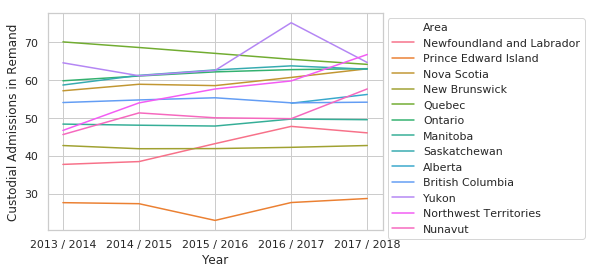

In [178]:
plot_df = df[df['Area'] != 'Provinces and territories']
sns.lineplot(data = plot_df, x='Year', y='Custodial Admissions in Remand', hue='Area')
plt.legend(bbox_to_anchor=(1,1))

In [174]:
plot_df.groupby('Area')['Custodial Admissions in Remand'].median().sort_values()

Area
Prince Edward Island         27.727856
New Brunswick                42.326733
Newfoundland and Labrador    43.300493
Manitoba                     48.456539
Nunavut                      50.116822
British Columbia             54.238528
Alberta                      55.123534
Northwest Territories        57.722008
Nova Scotia                  58.968301
Ontario                      62.233965
Saskatchewan                 62.748369
Yukon                        64.625850
Quebec                       67.119194
Name: Custodial Admissions in Remand, dtype: float64

In [175]:
df.sort_values(['Custodial Admissions in Remand'])

,Area,Year,Total custodial admissions,Sentenced,Remand,Other custodial statuses,Probation,Conditional sentence,Custodial Admissions in Remand
12,Prince Edward Island,2015 / 2016,664,511,153,0,708,18,23.042169
11,Prince Edward Island,2014 / 2015,754,547,207,0,854,20,27.453581
10,Prince Edward Island,2013 / 2014,779,562,216,1,912,19,27.727856
13,Prince Edward Island,2016 / 2017,670,484,186,0,706,25,27.761194
14,Prince Edward Island,2017 / 2018,680,481,196,3,752,19,28.823529
5,Newfoundland and Labrador,2013 / 2014,1901,1085,719,97,1427,436,37.822199
6,Newfoundland and Labrador,2014 / 2015,1981,1131,764,86,1392,458,38.566381
21,New Brunswick,2014 / 2015,4736,2306,1987,443,1588,500,41.955236
22,New Brunswick,2015 / 2016,5046,2392,2119,535,1566,507,41.993658
23,New Brunswick,2016 / 2017,5252,2514,2223,515,1595,520,42.326733


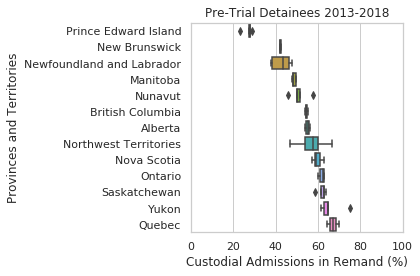

In [179]:
med_order = plot_df.groupby('Area')['Custodial Admissions in Remand'].median().sort_values().index
sns.boxplot(data = plot_df, x='Custodial Admissions in Remand', y='Area', order=med_order)
plt.xlim(0,100)
plt.title('Pre-Trial Detainees 2013-2018')
plt.ylabel("Provinces and Territories")
plt.xlabel('Custodial Admissions in Remand (%)')
plt.tight_layout()
plt.savefig('remand.png', dpi=300)

In [33]:
df.loc['index', df['index'].str.startswith('Unn')] = np.nan

ValueError: setting an array element with a sequence